# Unsupervised Learning: Clustering and Decomposition

We'll look at COVID cases per day for each county in WI.  We'll use three unsupervised learning techniques to understand multi-county patterns:

1. KMeans (clustering)
2. AgglomerativeClustering (clustering)
3. PCA (decomposition)

First, let's import all that we need:

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

## Mapping

We'll be creating maps of WI.  I already grabbed shapefile of the counties from here: https://data-wi-dnr.opendata.arcgis.com/datasets/8b8a0896378449538cf1138a969afbc6_3.  I renamed it "wi.zip".  We rename "Saint Croix" to "St. Croix" for consistency with our later dataset.

In [3]:
wi = gpd.read_file("zip://wi.zip")
wi = wi.set_index(wi["COUNTY_NAM"].str.replace("Saint", "St.")).copy()
wi.head()

,OBJECTID,DNR_REGION,DNR_CNTY_C,COUNTY_NAM,COUNTY_FIP,SHAPEAREA,SHAPELEN,geometry
COUNTY_NAM,,,,,,,,
Kenosha,321,Southeast Region,30,Kenosha,59,7.210454e+08,123267.303863,"MULTIPOLYGON (((699813.437 246226.688, 699794...."
Lafayette,322,South Central Region,33,Lafayette,65,1.641795e+09,164707.650040,"POLYGON ((503148.082 260278.466, 503292.672 26..."
Rock,323,South Central Region,54,Rock,105,1.879382e+09,174114.587670,"POLYGON ((600602.683 264347.425, 603850.419 26..."
Walworth,324,Southeast Region,65,Walworth,127,1.492598e+09,154833.279357,"POLYGON ((658404.520 263083.277, 658417.776 26..."
Green,325,South Central Region,23,Green,45,1.512855e+09,155741.104373,"POLYGON ((571551.903 263810.562, 571555.279 26..."


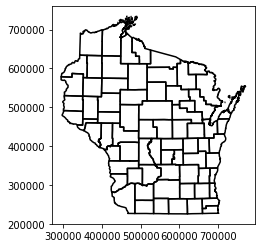

In [4]:
wi.boundary.plot(color="black")

## COVID Data

Let's use wi-covid.csv that we used in previous lectures:

In [5]:
df = pd.read_csv("wi-covid.csv")
df.head()

,NAME,DATE,POS_7DAYAVG,DTH_NEW,DTH_NEW_2WK
0,Adams,2020-03-16,0.0,0.0,0.0
1,Ashland,2020-03-16,0.0,0.0,0.0
2,Barron,2020-03-16,0.0,0.0,0.0
3,Bayfield,2020-03-16,0.0,0.0,0.0
4,Brown,2020-03-16,0.0,0.0,0.0


For clustering, we'll want each county on its own row.  Historical data should be spread across columns, so that we can group rows based on year-long trends.  Pandas's `pivot` function can automatially take three columns and put the values of one to the index, the values of another to the columns, and the values of the third to the cells of the final table:

In [6]:
df = pd.pivot(df, index="NAME", columns="DATE", values="POS_7DAYAVG")
df.head()

DATE,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,...,2021-02-21,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02
NAME,,,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,3.00,2.71,2.57,3.14,2.14,1.86,1.29,1.29,1.57,1.29
Ashland,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.43,0.43,0.71,0.57,0.71,0.71,0.57,0.57,0.43,0.29
Barron,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,7.71,7.29,7.57,7.71,8.14,7.71,8.29,9.00,8.86,8.57
Bayfield,0.0,0.0,0.00,0.25,0.2,0.17,0.14,0.14,0.14,0.14,...,0.14,0.14,0.29,0.29,0.14,0.29,0.29,0.29,0.43,0.43
Brown,0.0,0.0,0.33,0.50,0.4,0.50,0.43,0.43,0.43,0.29,...,23.29,23.57,18.86,18.71,21.57,20.86,20.14,19.57,19.71,18.00


## Clustering: KMeans and Agglomerative

Now, let's use KMeans clustering to group similar rows.  Note that for this example, we're just clustering based on total cases (for many use cases, it may make sense to scale by population or other otherwise standardize the data).

In [7]:
km = KMeans(n_clusters=8)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
clusters = km.predict(df)
clusters

array([1, 1, 4, 1, 7, 1, 1, 4, 4, 1, 4, 1, 3, 5, 1, 1, 4, 5, 1, 5, 1, 4,
       1, 1, 1, 1, 1, 4, 1, 5, 1, 5, 1, 1, 1, 4, 5, 1, 1, 1, 2, 4, 1, 1,
       0, 4, 1, 1, 4, 4, 1, 5, 1, 5, 1, 4, 1, 4, 5, 4, 1, 1, 1, 1, 4, 1,
       5, 6, 4, 1, 0, 4], dtype=int32)

Let's put those cluster IDs back in the GeoDataFrame so we can plot it.  The cluster IDs are in an order corresponding to the DataFrame we fit to (`df`).  This is probably the same as the order in the `wi` DataFrame, but we should explicitly assign the index to each cluster ID before adding it to a different DataFrame, just to be safe.

In [9]:
wi["cluster"] = pd.Series(clusters, index=df.index)
wi.head()

,OBJECTID,DNR_REGION,DNR_CNTY_C,COUNTY_NAM,COUNTY_FIP,SHAPEAREA,SHAPELEN,geometry,cluster
COUNTY_NAM,,,,,,,,,
Kenosha,321,Southeast Region,30,Kenosha,59,7.210454e+08,123267.303863,"MULTIPOLYGON (((699813.437 246226.688, 699794....",5
Lafayette,322,South Central Region,33,Lafayette,65,1.641795e+09,164707.650040,"POLYGON ((503148.082 260278.466, 503292.672 26...",1
Rock,323,South Central Region,54,Rock,105,1.879382e+09,174114.587670,"POLYGON ((600602.683 264347.425, 603850.419 26...",5
Walworth,324,Southeast Region,65,Walworth,127,1.492598e+09,154833.279357,"POLYGON ((658404.520 263083.277, 658417.776 26...",4
Green,325,South Central Region,23,Green,45,1.512855e+09,155741.104373,"POLYGON ((571551.903 263810.562, 571555.279 26...",1


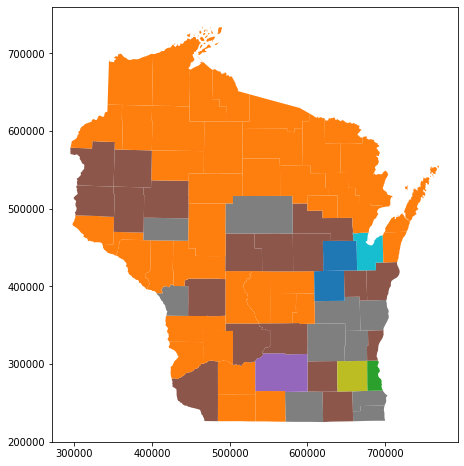

In [10]:
wi.plot(column=wi["cluster"], cmap="tab10", figsize=(8,8))

Compactly, we could have done all the fitting and plotting in just three lines (note that clusters will probably be similar, but the colors for each cluster might change each time we run this):

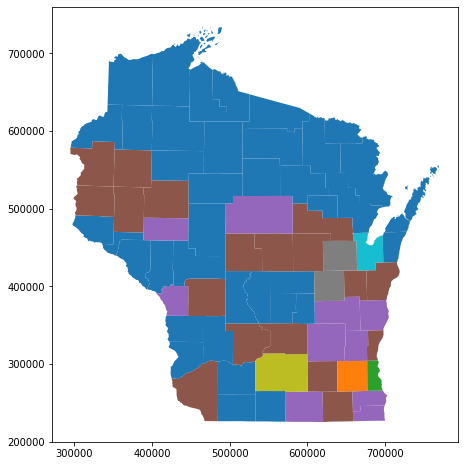

In [11]:
clusters = KMeans(n_clusters=8).fit_predict(df)
wi["cluster"] = pd.Series(clusters, index=df.index)
wi.plot(column=wi["cluster"], cmap="tab10", figsize=(8,8))

We can simply replace `KMeans` with `AgglomerativeClustering` to see how the latter algorithm groups states:

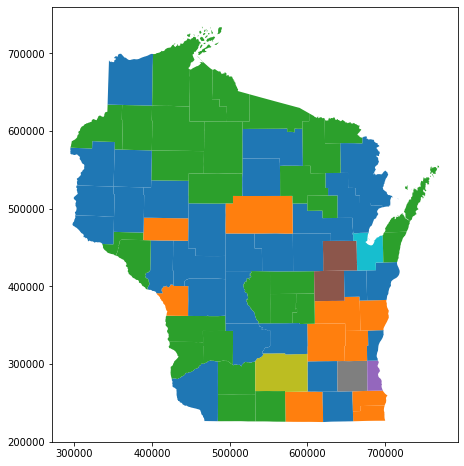

In [12]:
clusters = AgglomerativeClustering(n_clusters=8).fit_predict(df)
wi["cluster"] = pd.Series(clusters, index=df.index)
wi.plot(column=wi["cluster"], cmap="tab10", figsize=(8,8))

## PCA: Principal Component Analysis

For this analysis, we'll be looking at a tranpose of the earlier data:

In [13]:
dft = df.T
print("shape:", dft.shape)
print("variance:", dft.values.var())
dft.head()

shape: (352, 72)
variance: 3230.8970796538392


NAME,Adams,Ashland,Barron,Bayfield,Brown,Buffalo,Burnett,Calumet,Chippewa,Clark,...,Vernon,Vilas,Walworth,Washburn,Washington,Waukesha,Waupaca,Waushara,Winnebago,Wood
DATE,,,,,,,,,,,,,,,,,,,,,
2020-03-16,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,2.00,1.00
2020-03-17,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.50,0.0,0.0,1.00,0.50
2020-03-18,0.0,0.0,0.0,0.00,0.33,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.67,0.67,0.0,0.0,0.67,0.33
2020-03-19,0.0,0.0,0.0,0.25,0.50,0.0,0.0,0.25,0.0,0.0,...,0.0,0.0,0.5,0.0,0.50,2.25,0.0,0.0,1.00,0.25
2020-03-20,0.0,0.0,0.0,0.20,0.40,0.0,0.0,0.20,0.2,0.0,...,0.0,0.0,0.6,0.0,0.60,2.40,0.0,0.0,0.80,0.20


We have 352 rows, but of course there will be similarities across them.  Can we approximate the table by finding a few key rows (called components), such that every row in approximately some weighted combination of those component rows?  In particular, how much of the 3230.9 variance can be explained by these few rows?

A principal component analysis (PCA) can help us find such components and tell us how much of the variance those components can explain.

Passing 0.95 tells the PCA that we want it to find however many component rows are necessary to explain 95% of the variance in our original table (alternatively, we could pass an integer to require an exact number of components):

In [14]:
pca = PCA(0.95)
pca.fit(dft)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

`explained_variance_ratio_` tells us how many components are necessary, and how much variance they each explain.  In this case, one component row can explain 90.6% of the variance, and a second component row can explain an additional 4.5%.

In [15]:
pca.explained_variance_ratio_

array([0.90638618, 0.04510856])

Let's see what those two rows look like in a table.  `components_` gives us a numpy array, but we can use the same column names from our original DataFrame.

In [16]:
components = pd.DataFrame(pca.components_, columns=dft.columns)
components

NAME,Adams,Ashland,Barron,Bayfield,Brown,Buffalo,Burnett,Calumet,Chippewa,Clark,...,Vernon,Vilas,Walworth,Washburn,Washington,Waukesha,Waupaca,Waushara,Winnebago,Wood
0,0.014671,0.012164,0.063659,0.012197,0.186703,0.013653,0.012156,0.039235,0.081403,0.034584,...,0.017245,0.018460,0.065934,0.013056,0.120046,0.379391,0.034502,0.018779,0.124864,0.068892
1,0.010148,0.000019,-0.026789,-0.001165,0.488611,-0.003380,0.000764,0.125926,0.006220,0.003825,...,0.003234,0.010982,-0.023864,-0.011774,0.010618,-0.225074,0.099319,0.058002,0.452854,-0.009747


Let's visualize those components on a map.  We'll use the `coolwarm` colormap (https://matplotlib.org/stable/gallery/color/colormap_reference.html).  We want blues to be negative, reds to be positive, and gray to be about zero.  This means we'll need to pass in a vmin and vmax that are equally distance from zero.  Let's first find a value for this.

In [17]:
cap = components.values.max()
cap

0.6830682912657138

Let's add the rows of the components table as columns to the GeoDataFrame (`wi`).

In [18]:
wi["pc0"] = components.iloc[0]
wi["pc1"] = components.iloc[1]
wi.head()

,OBJECTID,DNR_REGION,DNR_CNTY_C,COUNTY_NAM,COUNTY_FIP,SHAPEAREA,SHAPELEN,geometry,cluster,pc0,pc1
COUNTY_NAM,,,,,,,,,,,
Kenosha,321,Southeast Region,30,Kenosha,59,7.210454e+08,123267.303863,"MULTIPOLYGON (((699813.437 246226.688, 699794....",1,0.112478,-0.083256
Lafayette,322,South Central Region,33,Lafayette,65,1.641795e+09,164707.650040,"POLYGON ((503148.082 260278.466, 503292.672 26...",2,0.013154,0.014847
Rock,323,South Central Region,54,Rock,105,1.879382e+09,174114.587670,"POLYGON ((600602.683 264347.425, 603850.419 26...",1,0.120181,0.062958
Walworth,324,Southeast Region,65,Walworth,127,1.492598e+09,154833.279357,"POLYGON ((658404.520 263083.277, 658417.776 26...",0,0.065934,-0.023864
Green,325,South Central Region,23,Green,45,1.512855e+09,155741.104373,"POLYGON ((571551.903 263810.562, 571555.279 26...",2,0.020049,0.014773


Text(0.5, 1.0, 'Component 1')

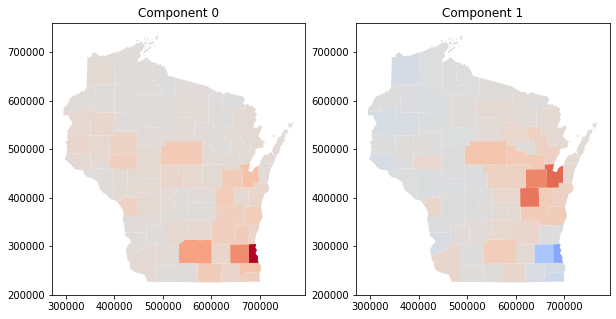

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
wi.plot(column=wi["pc0"], cmap="coolwarm", figsize=(8,8), ax=axes[0], vmin=-cap, vmax=cap)
wi.plot(column=wi["pc1"], cmap="coolwarm", figsize=(8,8), ax=axes[1], vmin=-cap, vmax=cap)
axes[0].set_title("Component 0")
axes[1].set_title("Component 1")

Although all 72 counties could in theory vary independently, we can take different combinations of just those two maps (added to a base map of the average per county) and explain 95% of all variance.

Let's see what that base map looks like (similar to component 0, it turns out):

In [20]:
mean = pd.Series(pca.mean_, index=dft.columns)
mean

NAME
Adams          4.484290
Ashland        3.334858
Barron        15.192472
Bayfield       3.024574
Brown         85.731733
                ...    
Waukesha     115.279972
Waupaca       13.570511
Waushara       5.961534
Winnebago     48.406193
Wood          18.998011
Length: 72, dtype: float64

Text(0.5, 1.0, 'mean')

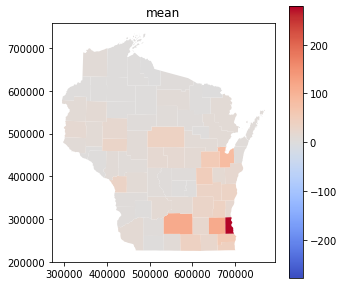

In [21]:
wi["mean"] = mean
cap = mean.max()
ax = wi.plot(column=wi["mean"], cmap="coolwarm",
             figsize=(5,5), vmin=-cap, vmax=cap, legend=True)
ax.set_title("mean")

How do we weight the combinations of component rows to approximately construct a given row in our original dataset?  We can do this with component weights, as given by the `PCA.transform` method.

In [22]:
pc_coef = pd.DataFrame(pca.transform(dft), index=dft.index).round(2)
pc_coef.head()

,0,1
DATE,,
2020-03-16,-363.67,-2.28
2020-03-17,-360.99,-3.83
2020-03-18,-357.78,-5.66
2020-03-19,-356.65,-5.82
2020-03-20,-355.23,-6.59


Even though we have 2 number per day instead of the 72 per-county numbers per day, we can use those two numbers as weights on the component rows to approximately reconstruct those 72 numbers.  Let's try it for a specific date: Mar 1st, 2021.

In [23]:
mar1 = "2021-03-01"
pc_coef.loc[mar1]

0   -231.30
1      4.62
Name: 2021-03-01, dtype: float64

In [24]:
components

NAME,Adams,Ashland,Barron,Bayfield,Brown,Buffalo,Burnett,Calumet,Chippewa,Clark,...,Vernon,Vilas,Walworth,Washburn,Washington,Waukesha,Waupaca,Waushara,Winnebago,Wood
0,0.014671,0.012164,0.063659,0.012197,0.186703,0.013653,0.012156,0.039235,0.081403,0.034584,...,0.017245,0.018460,0.065934,0.013056,0.120046,0.379391,0.034502,0.018779,0.124864,0.068892
1,0.010148,0.000019,-0.026789,-0.001165,0.488611,-0.003380,0.000764,0.125926,0.006220,0.003825,...,0.003234,0.010982,-0.023864,-0.011774,0.010618,-0.225074,0.099319,0.058002,0.452854,-0.009747


In [25]:
-231.3 * components.loc[0] + 4.62 * components.loc[1] + mean

NAME
Adams         1.137748
Ashland       0.521406
Barron        0.344396
Bayfield      0.197941
Brown        44.804757
               ...    
Waukesha     26.487082
Waupaca       6.049110
Waushara      1.885923
Winnebago    21.617261
Wood          3.018259
Length: 72, dtype: float64

Or, more concisely using the dot product:

In [26]:
approx = pc_coef.loc["2021-03-01"] @ components + mean
approx

NAME
Adams         1.137748
Ashland       0.521406
Barron        0.344396
Bayfield      0.197941
Brown        44.804757
               ...    
Waukesha     26.487082
Waupaca       6.049110
Waushara      1.885923
Winnebago    21.617261
Wood          3.018259
Length: 72, dtype: float64

Text(0.5, 1.0, 'Reconstructed from 2 PC weights')

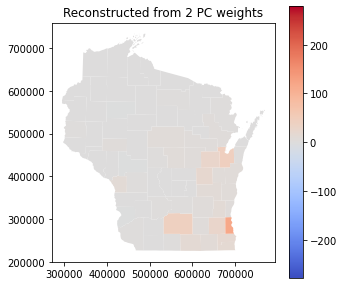

In [27]:
wi["approx"] = approx
ax = wi.plot(column=wi["approx"], cmap="coolwarm",
             figsize=(5,5), vmin=-cap, vmax=cap, legend=True)
ax.set_title("Reconstructed from 2 PC weights")

How does that compare to what the state *actually* looked like on March 1st:

Text(0.5, 1.0, 'Actual')

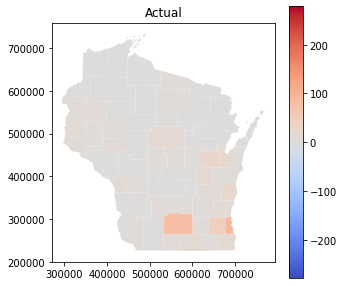

In [28]:
wi["actual"] = dft.loc[mar1]
ax = wi.plot(column=wi["actual"], cmap="coolwarm",
             figsize=(5,5), vmin=-cap, vmax=cap, legend=True)
ax.set_title("Actual")

Not bad!

## Conclusion

In these examples, we weren't trying to predict anything.  We were looking for patterns and simplicity underlying our data; we were applying unsupervised learning.  For the two clustering approaches, we tried to group similar counties.  For the PCA, we tried to understand how counties vary together.